### Imports

In [1]:
# imports
from feature_processor import *
from tvbvar import *

### Feature processing

In [2]:
# path to data folder
path = '/home/romain/clean_codes/6_tvbvar'
# name of file containing monthly features
feature_file = 'features.csv'
# name of file containing the information about monthly data
information_file = 'information.csv'

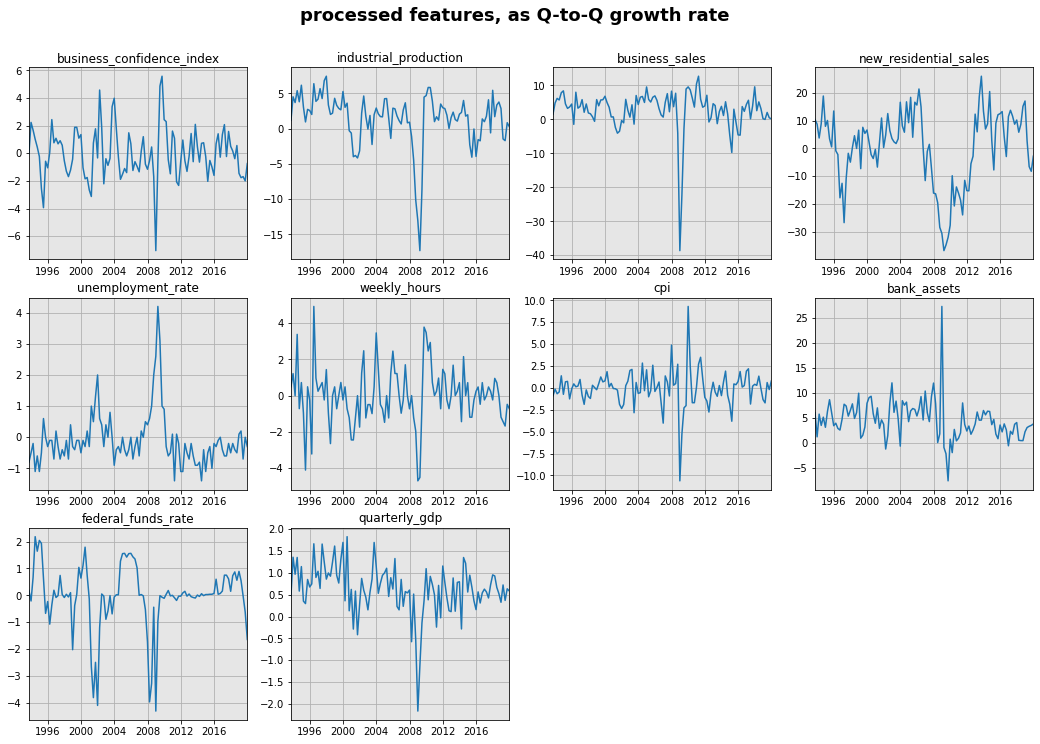

In [3]:
# declare feature processor
fp = FeatureProcessor(path, feature_file, information_file)
# load, process, and plot
fp.data_loader()
fp.data_processor()
fp.plot_processed_data()

In [4]:
# overview of processed features in dataframe
features = fp.processed_features
features.head(6)

,business_confidence_index,industrial_production,business_sales,new_residential_sales,unemployment_rate,weekly_hours,cpi,bank_assets,federal_funds_rate,quarterly_gdp
date,,,,,,,,,,
1993-09-30,-0.01763,1.174819,1.526916,10.375088,-0.8,0.489573,-0.896798,6.056690,0.18,0.477315
1993-12-31,2.23292,4.516257,4.820045,8.713100,-0.5,1.212714,-0.140156,1.243932,-0.21,1.360113
1994-03-31,1.67461,3.695746,6.177410,3.742247,-0.2,-0.009381,-0.671583,5.767958,0.67,0.970216
1994-06-30,1.01670,5.385214,5.706889,8.908318,-1.1,3.377695,-0.459493,3.522080,2.18,1.355046
1994-09-30,0.45180,3.808076,7.841516,18.823001,-0.6,-0.719138,1.381100,5.161621,1.64,0.584515
1994-12-31,-0.23480,6.156890,8.395498,7.938450,-1.1,0.719138,-0.734759,3.148223,2.04,1.145524


### Time-varying Bayesian VAR model

In [5]:
# lags
p = 2
# number of total iterations of the MCMC algorithm
r = 6000
# number of burn-in iterations of the MCMC algorithm
d = 2000

In [6]:
# declare Time-varying BVAR
tvbvar = Time_Varying_Bvar(feature_dataframe = features)
# get prior hyperparameters
tvbvar.prior_hyperparameters(p)
# get posterior hyperparameters
tvbvar.posterior_hyperparameters()
# run mcmc algorithm
tvbvar.mcmc(r, d)

iteration 10
iteration 20
iteration 30
iteration 40
iteration 50
iteration 60
iteration 70
iteration 80
iteration 90
iteration 100
iteration 110
iteration 120
iteration 130
iteration 140
iteration 150
iteration 160
iteration 170
iteration 180
iteration 190
iteration 200
iteration 210
iteration 220
iteration 230
iteration 240
iteration 250
iteration 260
iteration 270
iteration 280
iteration 290
iteration 300
iteration 310
iteration 320
iteration 330
iteration 340
iteration 350
iteration 360
iteration 370
iteration 380
iteration 390
iteration 400
iteration 410
iteration 420
iteration 430
iteration 440
iteration 450
iteration 460
iteration 470
iteration 480
iteration 490
iteration 500
iteration 510
iteration 520
iteration 530
iteration 540
iteration 550
iteration 560
iteration 570
iteration 580
iteration 590
iteration 600
iteration 610
iteration 620
iteration 630
iteration 640
iteration 650
iteration 660
iteration 670
iteration 680
iteration 690
iteration 700
iteration 710
iteration 720
i

iteration 5550
iteration 5560
iteration 5570
iteration 5580
iteration 5590
iteration 5600
iteration 5610
iteration 5620
iteration 5630
iteration 5640
iteration 5650
iteration 5660
iteration 5670
iteration 5680
iteration 5690
iteration 5700
iteration 5710
iteration 5720
iteration 5730
iteration 5740
iteration 5750
iteration 5760
iteration 5770
iteration 5780
iteration 5790
iteration 5800
iteration 5810
iteration 5820
iteration 5830
iteration 5840
iteration 5850
iteration 5860
iteration 5870
iteration 5880
iteration 5890
iteration 5900
iteration 5910
iteration 5920
iteration 5930
iteration 5940
iteration 5950
iteration 5960
iteration 5970
iteration 5980
iteration 5990
iteration 6000
8261.61 second for 6000 iterations.


### Volatility plot

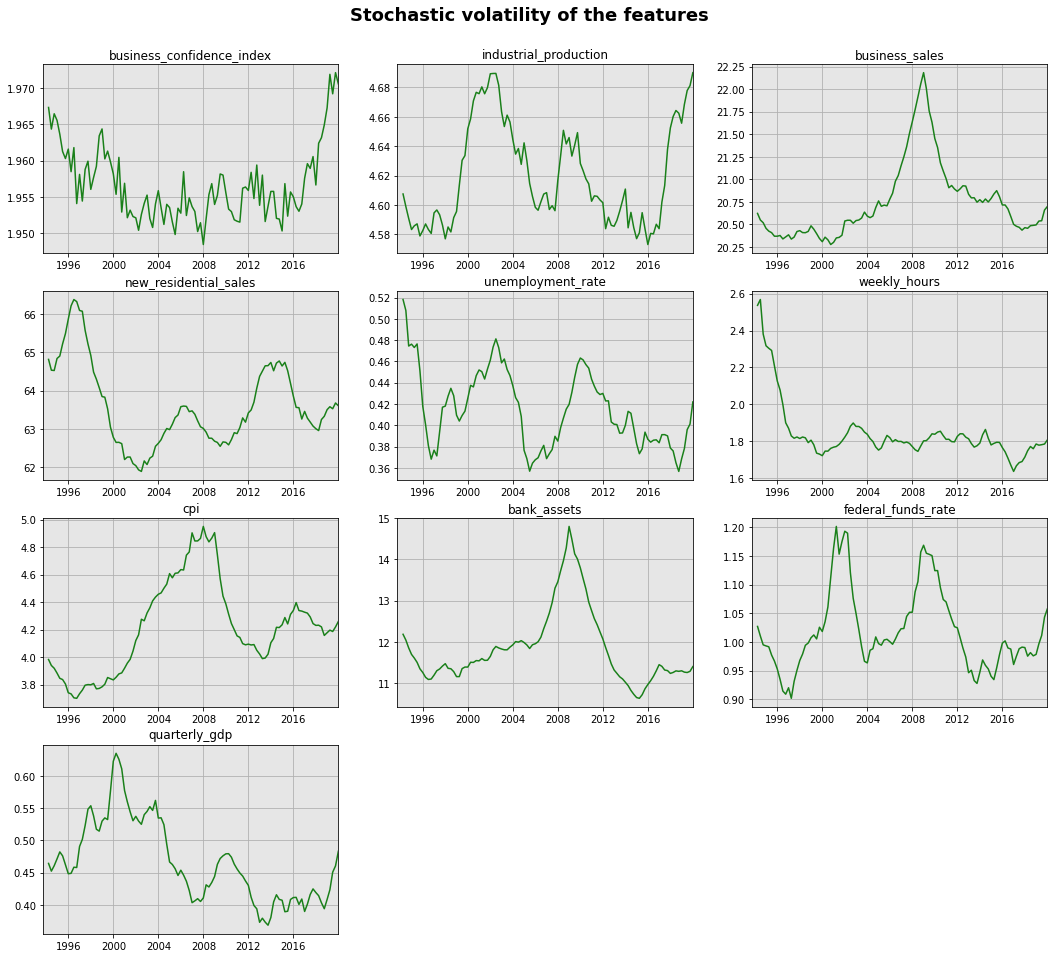

In [7]:
# plot volatility estimates
tvbvar.plot_volatility()

### Predictions

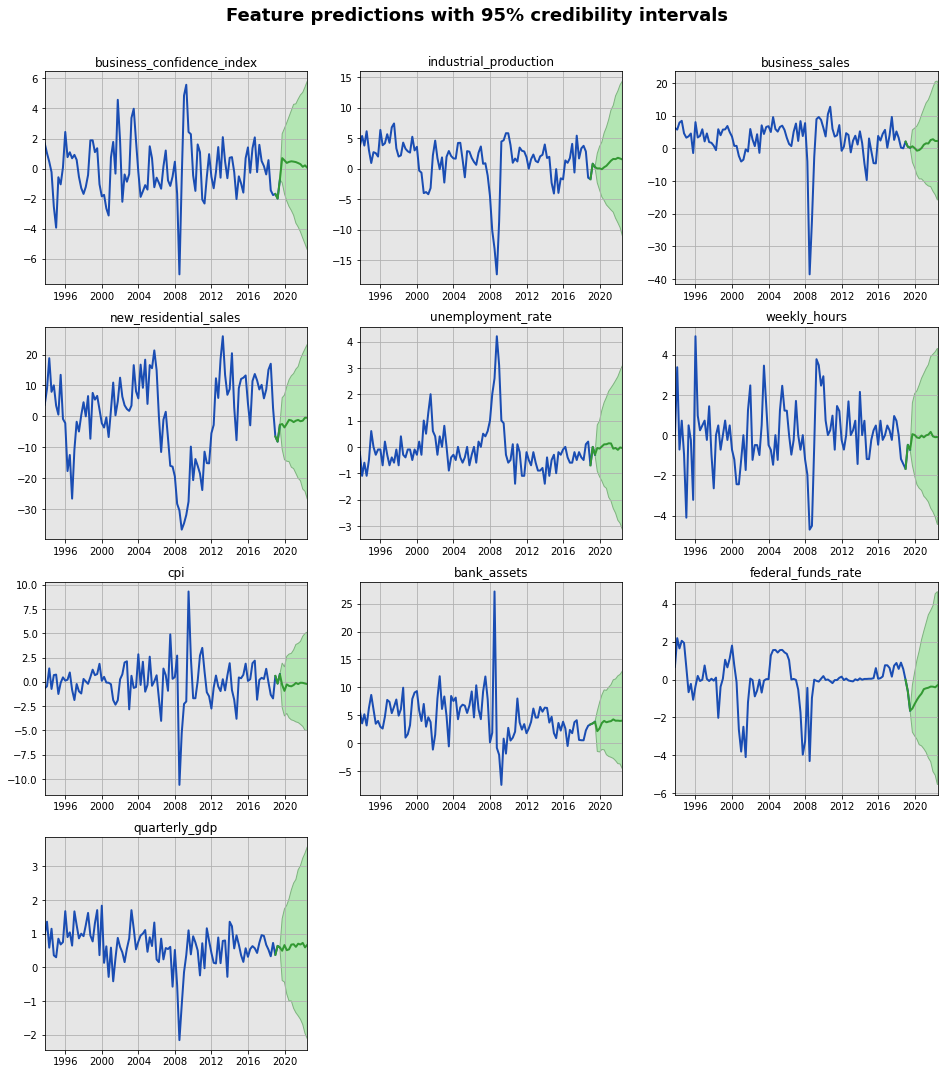

In [8]:
# number of periods ahead to forecast (in quarters)
h = 12
# generate predictions
tvbvar.forecast(h)
# plot predictions
tvbvar.plot_forecast()